In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
model = ResNet50(include_top=False, #  분류기(Dense)를 빼고 Conv레이어만 사용하겠다.
                 weights="imagenet")

Metal device set to: Apple M1


2022-12-12 17:17:33.175570: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-12 17:17:33.175687: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
model.trainable = False
model = Sequential([model,
                    GlobalAveragePooling2D(),
                    Dense(4, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23,595,908
Trainable params: 8,196
Non-trainable params: 23,587,712
_________________________________________________________________


In [4]:
model.compile(loss='categorical_crossentropy', # 변경 다중
              optimizer='adam',
              metrics=['accuracy'])

In [5]:
import os

# 기본 경로
base_dir = '/Users/hye/Desktop/HS/mok/2022/2학기/2.인공지능응용시스템/프로젝트/test2'

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')

In [6]:
BATCH_SIZE = 32
image_height = 160
image_width = 160

In [7]:
train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")


Found 1277 images belonging to 4 classes.


In [8]:
valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width), 
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )

Found 452 images belonging to 4 classes.


In [9]:
history=model.fit(train_generator,
          epochs=30,
          validation_data=valid_generator,
          verbose=2)

Epoch 1/30


2022-12-12 17:17:34.897180: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-12 17:17:36.185318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-12 17:17:47.437207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 - 16s - loss: 1.0884 - accuracy: 0.6460 - val_loss: 0.9678 - val_accuracy: 0.6969 - 16s/epoch - 408ms/step
Epoch 2/30
40/40 - 14s - loss: 0.9135 - accuracy: 0.7353 - val_loss: 0.8289 - val_accuracy: 0.7102 - 14s/epoch - 340ms/step
Epoch 3/30
40/40 - 14s - loss: 0.8248 - accuracy: 0.7361 - val_loss: 0.7713 - val_accuracy: 0.7080 - 14s/epoch - 343ms/step
Epoch 4/30
40/40 - 13s - loss: 0.7693 - accuracy: 0.7439 - val_loss: 0.7472 - val_accuracy: 0.7080 - 13s/epoch - 337ms/step
Epoch 5/30
40/40 - 13s - loss: 0.7264 - accuracy: 0.7447 - val_loss: 0.7328 - val_accuracy: 0.7058 - 13s/epoch - 336ms/step
Epoch 6/30
40/40 - 13s - loss: 0.6971 - accuracy: 0.7541 - val_loss: 0.7007 - val_accuracy: 0.7102 - 13s/epoch - 336ms/step
Epoch 7/30
40/40 - 14s - loss: 0.6678 - accuracy: 0.7596 - val_loss: 0.6805 - val_accuracy: 0.7080 - 14s/epoch - 342ms/step
Epoch 8/30
40/40 - 14s - loss: 0.6578 - accuracy: 0.7659 - val_loss: 0.6595 - val_accuracy: 0.7124 - 14s/epoch - 350ms/step
Epoch 9/30
40/40 - 

Text(0.5, 1.0, 'loss')

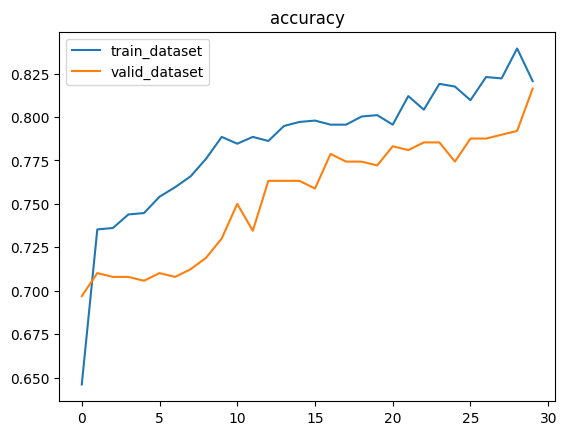

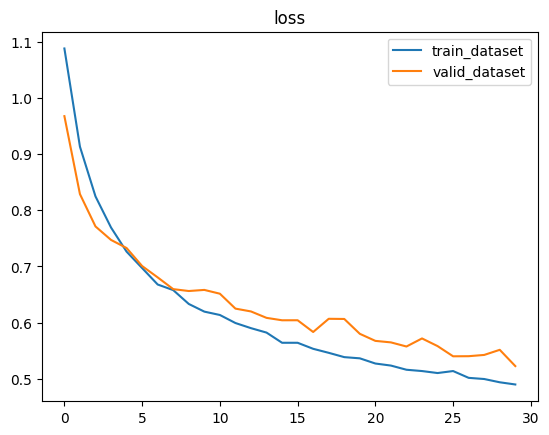

In [10]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="train_dataset")
plt.plot(epochs, val_accuracy, label="valid_dataset")
plt.legend()
plt.title('accuracy')
plt.figure()


plt.plot(epochs, loss, label="train_dataset")
plt.plot(epochs, val_loss, label="valid_dataset")
plt.legend()
plt.title('loss')


## 에폭 50으로 했을 때
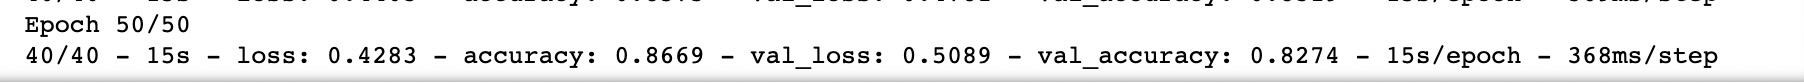
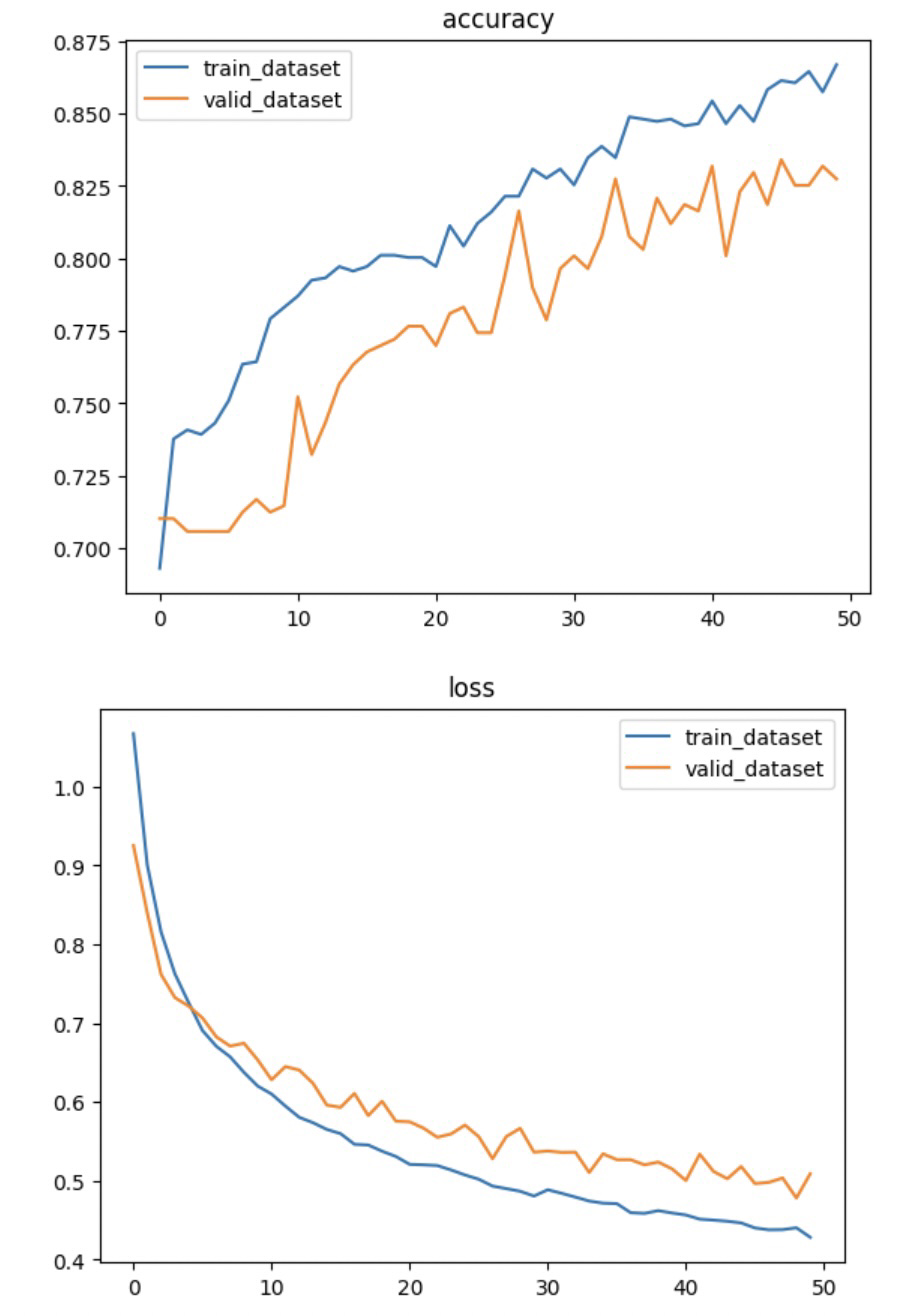

2022-12-12 17:25:06.687588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 775ms/step


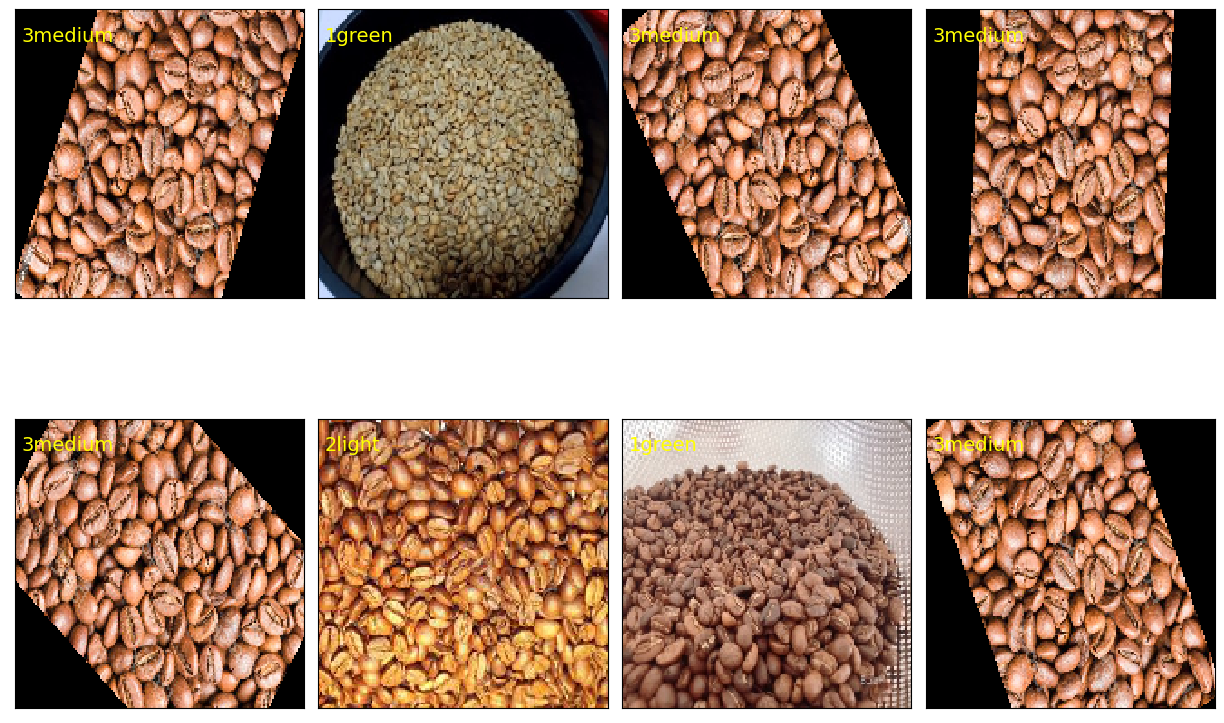

In [11]:
class_names = ['1green', '2light', '3medium', '4dark']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)


In [12]:
# 7. 모델 저장하기
from tensorflow.python.keras.models import load_model
model.save('model_resnet50.h5')

In [30]:
loss, acc = model.evaluate_generator(train_generator, steps=10, verbose=1)
print('loss: ', loss, 'accuracy: ', acc) # loss:  0.4534463981787364 accuracy:  0.8333333

/var/folders/kr/13b5rffx469g87nlgp_r232m0000gn/T/ipykernel_2480/3560373932.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = model.evaluate_generator(train_generator, steps=10, verbose=1)


10/10 [==============================] - 3s 248ms/step - loss: 0.5189 - accuracy: 0.8531
loss:  0.5189321637153625 accuracy:  0.8531250357627869
